In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
csv_file_path = "~/Downloads/kdrama.csv"
csv_file_path = os.path.expanduser(csv_file_path)

In [9]:
df = pd.read_csv(csv_file_path)

In [17]:
df['Watchers'] = pd.to_numeric(df['Watchers'], errors='coerce')

In [18]:
db_connection = sqlite3.connect("kdrama_database.db")

In [19]:
#Extract data
df.to_sql("kdramas", db_connection, index=False, if_exists="replace")


100

In [20]:
#Transform
top_10_popular_dramas = df.nlargest(10, 'Watchers')

In [21]:
#Load and visualize
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Move to Heaven'),
  Text(1, 0, 'Weak Hero Class 1 '),
  Text(2, 0, 'Hospital Playlist Season 2 '),
  Text(3, 0, 'Flower of Evil '),
  Text(4, 0, 'Hospital Playlist '),
  Text(5, 0, 'Alchemy of Souls '),
  Text(6, 0, 'Reply 1988 '),
  Text(7, 0, 'My Mister '),
  Text(8, 0, 'The Glory Part 2 '),
  Text(9, 0, "Under the Queen's Umbrella ")])

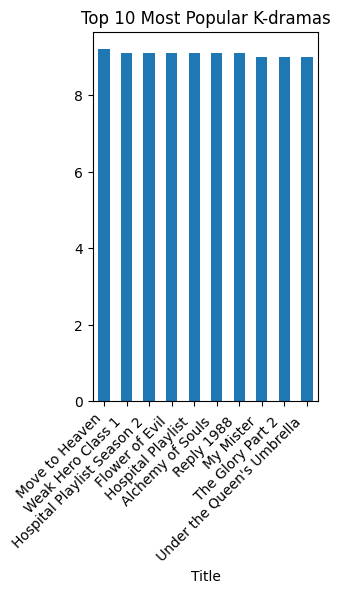

In [28]:
plt.subplot(1, 2, 1)
top_10_popular_dramas.plot(kind='bar', x='Title', y='Score', legend=False, ax=plt.gca())
plt.title('Top 10 Most Popular K-dramas')
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Top 5 Genres Distribution')

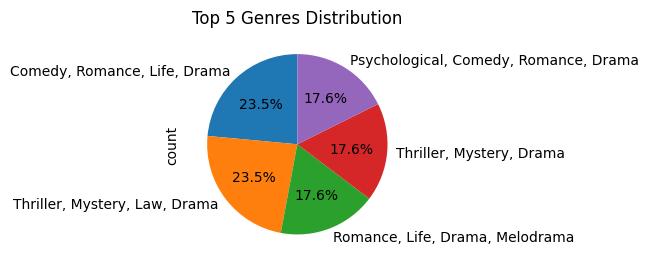

In [35]:
# Pie chart showing top 5 genres
plt.subplot(1, 2, 2)
top_genres = df['Genre'].value_counts().nlargest(5)
top_genres.plot.pie(autopct='%1.1f%%', startangle=90, ax=plt.gca())
plt.title('Top 5 Genres Distribution')

Text(0.5, 1.0, 'Top 6 Genre Display')

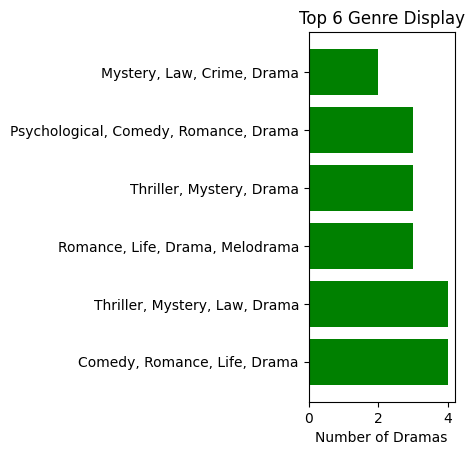

In [34]:
plt.subplot(1, 3, 3)
top_6_genres = df['Genre'].value_counts().nlargest(6)
genre_colors = ['green' if genre in top_6_genres.index else 'gray' for genre in top_6_genres.index]
plt.barh(top_6_genres.index, top_6_genres.values, color=genre_colors)
plt.xlabel('Number of Dramas')
plt.title('Top 6 Genre Display')

In [30]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [31]:
plt.show()

In [32]:
db_connection.close()